In [2]:
# -*- coding: utf-8 -*-

import config
from tools import datacleaner as dtclean
from tools import dataexplore as dtexp
from view import data_visualization as dtview
import pandas as pd
import numpy as np
from fbprophet import Prophet
from evaluation import forecast_metrics as fm
import seaborn as sns
import plotly.graph_objs as go
import plotly.tools
import matplotlib.pyplot as plt
# Offline mode
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import warnings
import dask.dataframe as dd
import dask as dsk

In [7]:
pd.options.display.max_rows = 10
path = getattr(config,'csvpath','default_value')

df_pandas = pd.read_csv(path+'/FDATA_tienda_ventas_caja.csv')

In [10]:
df_lojas_vendas_caixa = dd.from_pandas(df_pandas, npartitions=3)# dd.read_csv(path+'/FDATA_tienda_ventas_caja.csv')
new_columns = ['loja', 'caixa', 'horario', 'horainicio', 'horafim', 'quantidade', 'numero', 'clientes','imposto']
df_lojas_vendas_caixa = df_lojas_vendas_caixa.rename(columns=dict(zip(df_lojas_vendas_caixa.columns, new_columns)))
df_lojas_vendas_caixa.partitions[0].compute()

,loja,caixa,horario,horainicio,horafim,quantidade,numero,clientes,imposto
0,37,7,2020-05-09 00:00:00.000,2020-05-09 19:00:00.000,2020-05-09 19:15:00.000,13.000000,9.0,8.0,6.980000
1,37,7,2020-05-09 00:00:00.000,2020-05-09 19:15:00.000,2020-05-09 19:30:00.000,14.000000,11.0,7.0,8.250000
2,37,7,2020-05-09 00:00:00.000,2020-05-09 19:30:00.000,2020-05-09 19:45:00.000,9.000000,6.0,1.0,6.050000
3,37,7,2020-05-09 00:00:00.000,2020-05-09 19:45:00.000,2020-05-09 20:00:00.000,22.000000,16.0,7.0,19.100000
4,37,7,2020-05-09 00:00:00.000,2020-05-09 20:00:00.000,2020-05-09 20:15:00.000,6.000000,4.0,2.0,3.660000
...,...,...,...,...,...,...,...,...,...
4272822,51,2,2017-01-20 00:00:00.000,2017-01-20 09:30:00.000,2017-01-20 09:45:00.000,27.313000,30.0,7.0,39.639999
4272823,51,2,2017-01-20 00:00:00.000,2017-01-20 09:45:00.000,2017-01-20 10:00:00.000,33.022999,34.0,8.0,53.099998
4272824,51,2,2017-01-20 00:00:00.000,2017-01-20 10:00:00.000,2017-01-20 10:15:00.000,71.777000,74.0,11.0,138.120000
4272825,51,2,2017-01-20 00:00:00.000,2017-01-20 10:15:00.000,2017-01-20 10:30:00.000,43.653000,54.0,10.0,95.239998


In [21]:
df_lojas_vendas_caixa.partitions[1].compute()


,loja,caixa,horario,horainicio,horafim,quantidade,numero,clientes,imposto
4272827,51,2,2017-01-20 00:00:00.000,2017-01-20 10:45:00.000,2017-01-20 11:00:00.000,71.153000,70.0,13.0,123.83000
4272828,51,2,2017-01-20 00:00:00.000,2017-01-20 11:00:00.000,2017-01-20 11:15:00.000,81.651001,82.0,10.0,130.10001
4272829,51,2,2017-01-20 00:00:00.000,2017-01-20 11:15:00.000,2017-01-20 11:30:00.000,77.136002,79.0,11.0,112.83000
4272830,51,2,2017-01-20 00:00:00.000,2017-01-20 11:30:00.000,2017-01-20 11:45:00.000,75.670998,84.0,12.0,156.91000
4272831,51,2,2017-01-20 00:00:00.000,2017-01-20 11:45:00.000,2017-01-20 12:00:00.000,117.542000,107.0,19.0,125.88000
...,...,...,...,...,...,...,...,...,...
8545649,37,7,2020-02-15 00:00:00.000,2020-02-15 11:15:00.000,2020-02-15 11:30:00.000,60.403999,39.0,17.0,37.59000
8545650,37,7,2020-02-15 00:00:00.000,2020-02-15 11:30:00.000,2020-02-15 11:45:00.000,51.000000,30.0,20.0,32.25000
8545651,37,7,2020-02-15 00:00:00.000,2020-02-15 11:45:00.000,2020-02-15 12:00:00.000,51.922001,52.0,22.0,39.48000
8545652,37,7,2020-02-15 00:00:00.000,2020-02-15 12:00:00.000,2020-02-15 12:15:00.000,54.243999,39.0,25.0,33.82000


In [12]:
df_lojas_vendas_caixa.partitions[2].compute()

,loja,caixa,horario,horainicio,horafim,quantidade,numero,clientes,imposto
8545654,37,7,2020-02-15 00:00:00.000,2020-02-15 12:30:00.000,2020-02-15 12:45:00.000,45.037998,34.0,26.0,27.990000
8545655,37,7,2020-02-15 00:00:00.000,2020-02-15 12:45:00.000,2020-02-15 13:00:00.000,46.119999,28.0,18.0,24.750000
8545656,37,7,2020-02-15 00:00:00.000,2020-02-15 13:00:00.000,2020-02-15 13:15:00.000,41.299999,41.0,22.0,27.280001
8545657,37,7,2020-02-15 00:00:00.000,2020-02-15 13:15:00.000,2020-02-15 13:30:00.000,30.482000,30.0,19.0,31.549999
8545658,37,7,2020-02-15 00:00:00.000,2020-02-15 13:30:00.000,2020-02-15 13:45:00.000,40.020000,20.0,13.0,19.730000
...,...,...,...,...,...,...,...,...,...
12818476,50,5,2016-12-22 00:00:00.000,2016-12-22 15:15:00.000,2016-12-22 15:30:00.000,21.000000,21.0,11.0,11.810000
12818477,50,5,2016-12-22 00:00:00.000,2016-12-22 15:30:00.000,2016-12-22 15:45:00.000,2.000000,2.0,2.0,0.840000
12818478,50,5,2016-12-22 00:00:00.000,2016-12-22 15:45:00.000,2016-12-22 16:00:00.000,6.000000,6.0,4.0,3.990000
12818479,50,5,2016-12-22 00:00:00.000,2016-12-22 16:00:00.000,2016-12-22 16:15:00.000,5.000000,5.0,2.0,2.790000


In [19]:

df_tmp = df_lojas_vendas_caixa.groupby(['loja']).clientes.sum()
df_tmp.head(50)

loja
2      175144.0
3      232480.0
4      124259.0
5      145174.0
10    1974872.0
        ...    
63    2614065.0
64    1522655.0
65    2270845.0
66    1278152.0
67     377468.0
Name: clientes, Length: 50, dtype: float64

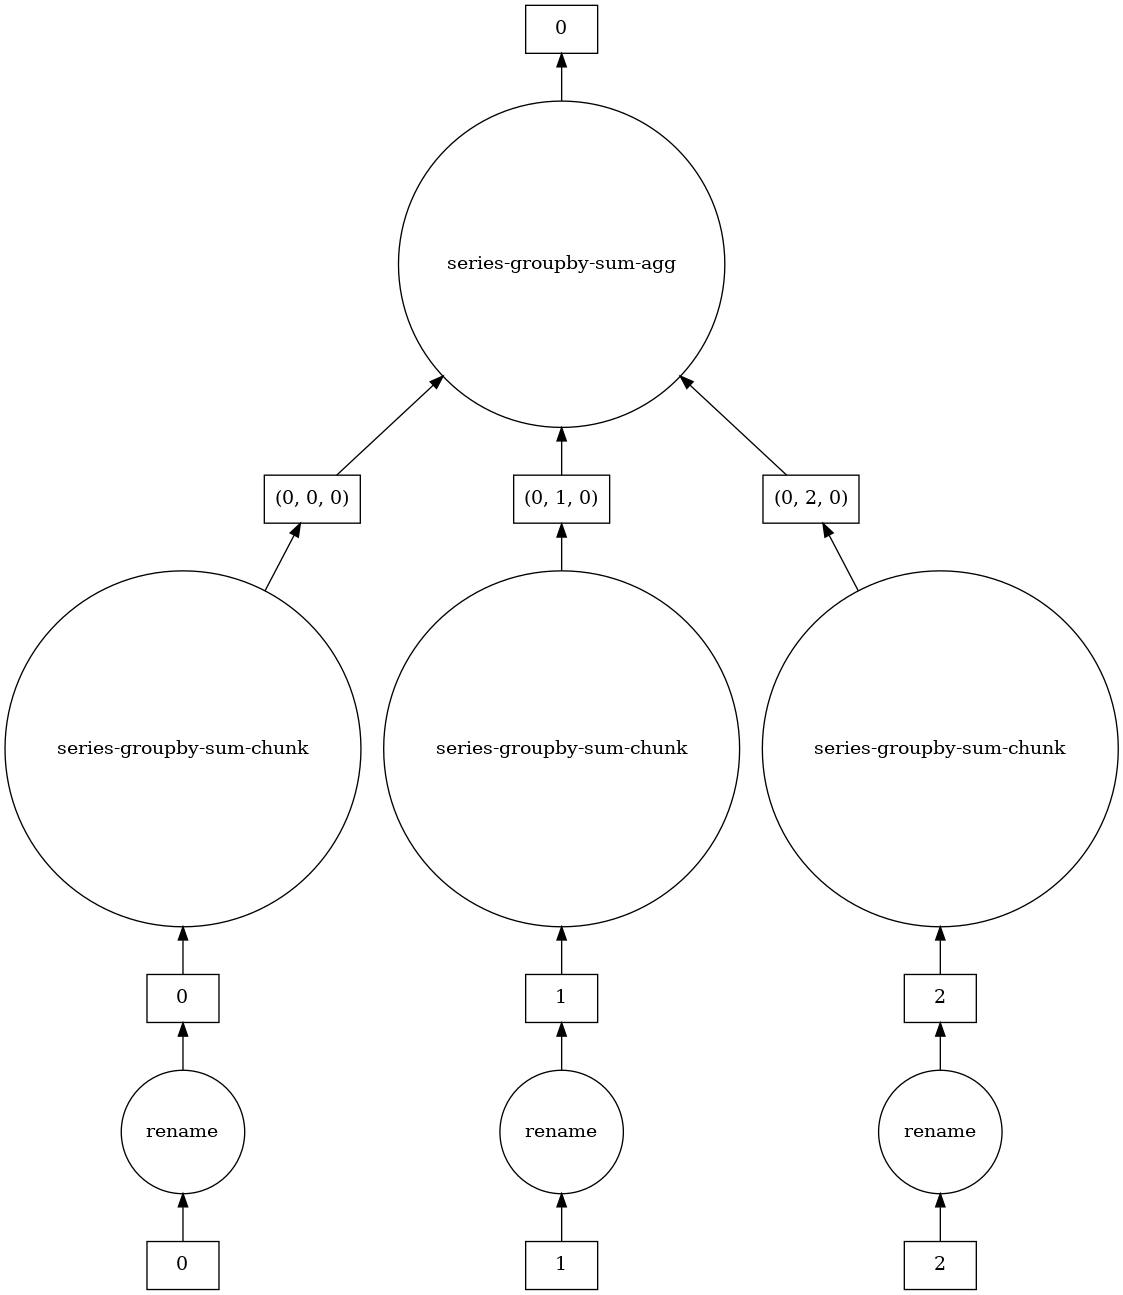

In [20]:
import graphviz

df_lojas_vendas_caixa.groupby(['loja']).clientes.sum().visualize()